SQL CONNECTION

In [1]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
import pandas as pd
db_config = {
    'host': 'localhost',
    'user': 'bbethi',
    'password': 'chrysalis steerage odometer',
    'database': 'I501_Fall2023_Sec22490_group04_db'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

try:
    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Example query: Select all rows from a table
    query = 'SELECT * FROM stroke_data'
    


    # Now, you can use Pandas to read data from the database
    df = pd.read_sql(query, connection)
    print("DataFrame from SQL:")
    print(df)

finally:
    # Close the cursor and connection
    cursor.close()
    connection.close()

DataFrame from SQL:
    COL 1 COL 2         COL 3          COL 4         COL 5      COL 6  \
0     sex   age  hypertension  heart_disease  ever_married  work_type   
1       1    41             1              0             1          3   
2       1    85             0              0             1          4   
3       1    17             1              0             0          4   
4       1    24             0              0             1          4   
..    ...   ...           ...            ...           ...        ...   
124     1    39             0              0             1          4   
125     1    70             0              0             1          3   
126     1    51             0              0             1          4   
127     1    58             0              1             0          4   
128     1    35             1              1             1          4   

              COL 7              COL 8 COL 9          COL 10  COL 11  
0    Residence_type  avg_glucose

/tmp/ipykernel_1121463/768332250.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [2]:
import pandas as pd
import numpy as np

<span style="font-size:24px">Data Cleansing</span>

In [3]:
df = pd.read_csv('Stroke_data.csv')
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42,0,0,1,3,0,216.38,34.5,0,0


There are 40910 rows and 11 columns in our dataset

In [4]:
Null_values = df.isnull().sum()
Null_values

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are 3 Null values in the sex column

In [5]:
mode = df['sex'].mode().iloc[0]
mode

1.0

As sex contains categorical data, we found mode to replace null values with it.

In [6]:
df['sex'] = df['sex'].fillna(mode)

we imputed null values with mode which represents males.

In [7]:
Null_values = df.isnull().sum()
Null_values

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

We checked for null values after replacing them and there are no null values now.

In [8]:
df.shape

(40910, 11)

There are 40910 rows and 11 columns in our dataset

In [9]:
df.size

450010

our Dataset contains a total of 450,010 elements.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  float64
 1   age                40910 non-null  int64  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.4 MB


In [11]:
df.dtypes

sex                  float64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

There are 7 columns classified as 'object' type and 4 columns designated as 'float'

In [12]:
df.isnull()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
40905,False,False,False,False,False,False,False,False,False,False,False
40906,False,False,False,False,False,False,False,False,False,False,False
40907,False,False,False,False,False,False,False,False,False,False,False
40908,False,False,False,False,False,False,False,False,False,False,False


In [13]:
Statistics = df.describe()
Statistics

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555194,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496950,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [14]:
df=df.loc[df['age'] > 0]
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42,0,0,1,3,0,216.38,34.5,0,0


We found negative values in age column. So we dropped them

In [15]:
Statistics = df.describe()
Statistics

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000,40829.000000
mean,0.554924,51.432977,0.213549,0.127630,0.821279,3.460922,0.514732,122.061277,30.405888,0.488819,0.499131
std,0.496980,21.514451,0.409817,0.333681,0.383123,0.781116,0.499789,57.551654,6.835290,0.499881,0.500005
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.740000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.410000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [16]:
df2=df.copy()

In [17]:
df.loc[:,'sex'] = df['sex'].replace({0: "female", 1: "male"})
df.loc[:,'hypertension'] = df['hypertension'].replace({0: "No", 1: "Yes"})
df.loc[:,'heart_disease'] = df['heart_disease'].replace({0: "No", 1: "Yes"})
df.loc[:,'ever_married'] = df['ever_married'].replace({0: "unmarried", 1: "married"})
df.loc[:,'work_type'] = df['work_type'].replace({0: "Never_worked", 1: "children", 2:"Govt_job", 3:"Self-employed", 4:"Private "})
df.loc[:,'Residence_type'] = df['Residence_type'].replace({0: "Rural", 1: "Urban"})
df.loc[:,'smoking_status'] = df['smoking_status'].replace({0: "Never smoked", 1: "smokes"})
df.loc[:,'stroke'] = df['stroke'].replace({0: "No", 1: "Yes"})

new_csv_file = 'STROKE_data.csv'
df.to_csv('STROKE_data.csv', encoding='utf-8')

In [18]:
df1 = pd.read_csv('STROKE_data.csv')
df1

,Unnamed: 0,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,male,63,No,Yes,married,Private,Urban,228.69,36.6,smokes,Yes
1,1,male,42,No,Yes,married,Private,Rural,105.92,32.5,Never smoked,Yes
2,2,female,61,No,No,married,Private,Urban,171.23,34.4,smokes,Yes
3,3,male,41,Yes,No,married,Self-employed,Rural,174.12,24.0,Never smoked,Yes
4,4,male,85,No,No,married,Private,Urban,186.21,29.0,smokes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
40824,40905,male,38,No,No,unmarried,Private,Urban,120.94,29.7,smokes,No
40825,40906,female,53,No,No,married,Private,Rural,77.66,40.8,Never smoked,No
40826,40907,male,32,No,No,married,Govt_job,Rural,231.95,33.2,Never smoked,No
40827,40908,male,42,No,No,married,Self-employed,Rural,216.38,34.5,Never smoked,No


After cleaning and preprocessing the data, there are 40,829 rows & 11 columns.

In [19]:
del df1['Unnamed: 0']

In [20]:
df1.shape

(40829, 11)

After cleaning and preprocessing the data, there are 40,829 rows & 11 columns.



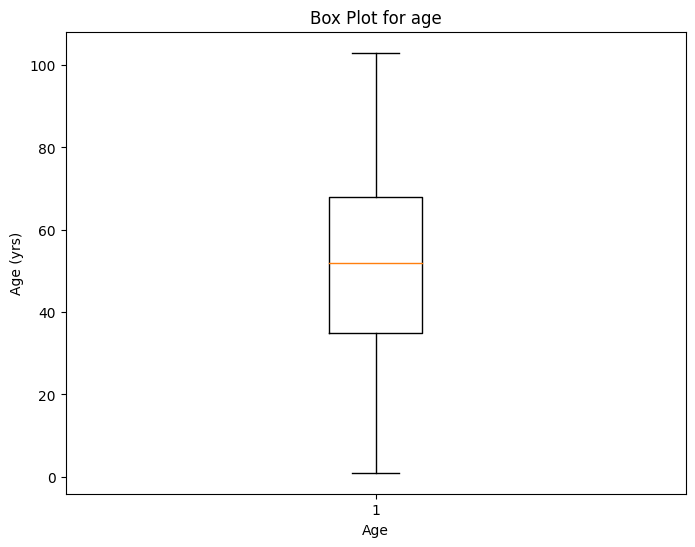

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df1['age'])  
plt.title('Box Plot for age')
plt.xlabel('Age')
plt.ylabel('Age (yrs)')
plt.show()

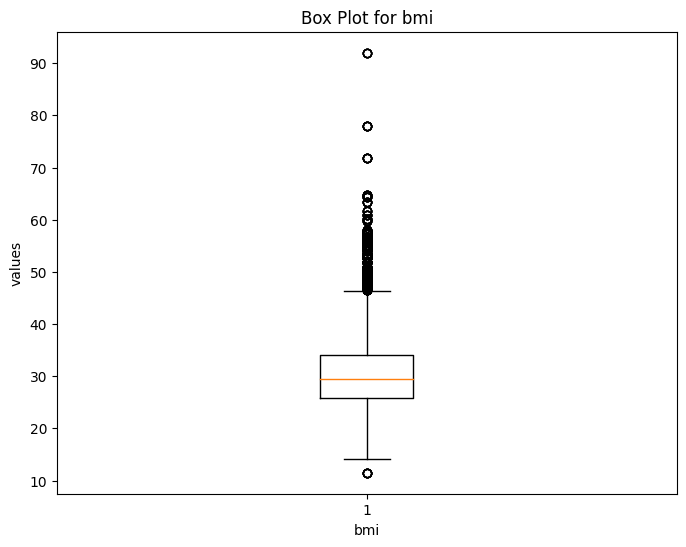

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df1['bmi'])
plt.title('Box Plot for bmi')
plt.xlabel('bmi')
plt.ylabel('values')
plt.show()

BMI data is assessed for outliers using a box plot.

In [23]:
import numpy as np
from scipy.stats.mstats import winsorize
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
columns_of_interest = ['bmi']
# Set the winsorizing limits (capping at the 5th and 95th percentiles)
winsorizing_limits = [0.05, 0.05]

# Winsorize BMI column
df1['bmi'] = winsorize(df1['bmi'], limits=winsorizing_limits)

# Print or use the winsorized DataFrame
print(df1)

          sex  age hypertension heart_disease ever_married      work_type  \
0        male   63           No           Yes      married       Private    
1        male   42           No           Yes      married       Private    
2      female   61           No            No      married       Private    
3        male   41          Yes            No      married  Self-employed   
4        male   85           No            No      married       Private    
...       ...  ...          ...           ...          ...            ...   
40824    male   38           No            No    unmarried       Private    
40825  female   53           No            No      married       Private    
40826    male   32           No            No      married       Govt_job   
40827    male   42           No            No      married  Self-employed   
40828    male   35           No            No    unmarried       Private    

      Residence_type  avg_glucose_level   bmi smoking_status stroke  
0    

Using winsorization,we capped the data at 5th and 95th percentile. We have replaced the extreme values with adjusted values for a more accurate dataset.


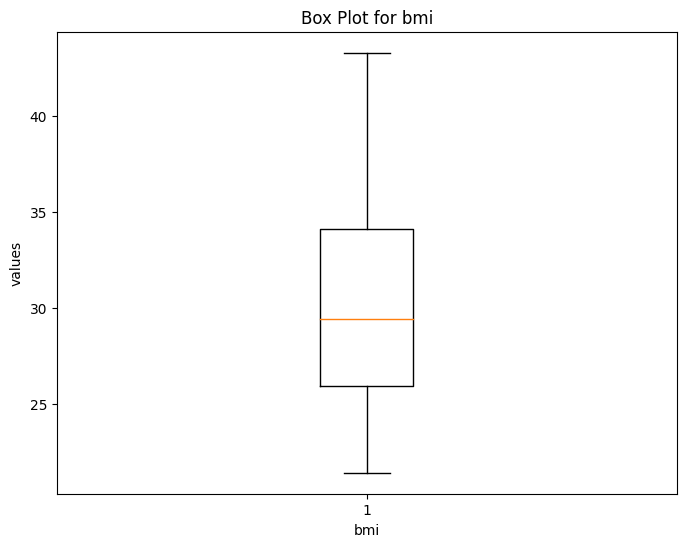

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df1['bmi'])
plt.title('Box Plot for bmi')
plt.xlabel('bmi')
plt.ylabel('values')
plt.show()

We checked for outliers after replacing them and there are no outliers.

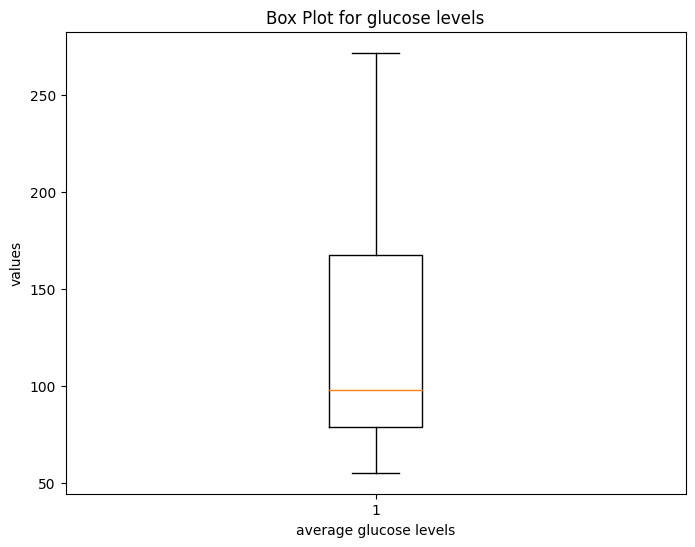

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df1['avg_glucose_level'])  
plt.title('Box Plot for glucose levels')
plt.xlabel('average glucose levels')
plt.ylabel('values')
plt.show()

BMI data is assessed for outliers using a box plot. There are no outliers.



DESCRIPTIVE STATISTICS

In [26]:
df1['sex'].value_counts()

sex
male      22657
female    18172
Name: count, dtype: int64

There are 18,172 females & 22,657 males in our dataset.

In [27]:
gender_description = df1['sex'].describe()
gender_description

count     40829
unique        2
top        male
freq      22657
Name: sex, dtype: object

In [28]:
df1['hypertension'].value_counts()


hypertension
No     32110
Yes     8719
Name: count, dtype: int64

Number of people having Hypertension are 8719.

In [29]:
df1['heart_disease'].value_counts()

heart_disease
No     35618
Yes     5211
Name: count, dtype: int64

Number of people having heart disease are 5211.

In [30]:
df1['ever_married'].value_counts()

ever_married
married      33532
unmarried     7297
Name: count, dtype: int64

In our dataset, 33,532 people are married.

In [31]:
df1['work_type'].value_counts()

work_type
Private          25516
Self-employed     9217
Govt_job          5580
children           431
Never_worked        85
Name: count, dtype: int64

In [32]:
df1['Residence_type'].value_counts()


Residence_type
Urban    21016
Rural    19813
Name: count, dtype: int64

In [33]:
df1['smoking_status'].value_counts()

smoking_status
Never smoked    20871
smokes          19958
Name: count, dtype: int64

19,958 people are smokers.

In [34]:
Count = df1['stroke'].value_counts()
Count

stroke
No     20450
Yes    20379
Name: count, dtype: int64

In our dataset, there are 20,379 individuals who have experienced a stroke & 20,450 people who did not experience stroke.

<span style="font-size:24px">Data Visualisation</span>

In [35]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


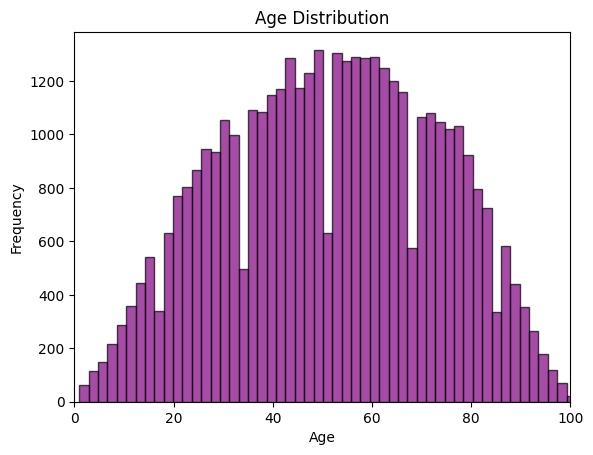

In [36]:
import matplotlib.pyplot as plt
values = df1['age']
plt.hist(values, bins = 'auto', color='purple', edgecolor='black', alpha = 0.7)
plt.xlim(0, 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

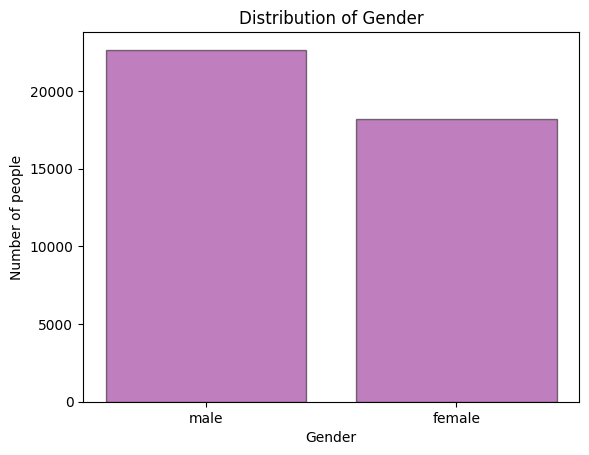

In [37]:
import matplotlib.pyplot as plt
gender_proportion = df1['sex'].value_counts()
Gender = gender_proportion.index  
Count = gender_proportion.values
plt.bar(Gender, Count, color='purple', edgecolor='black', alpha = 0.5)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

The bar graph shows that 22,669 are male, and 18,182 are female

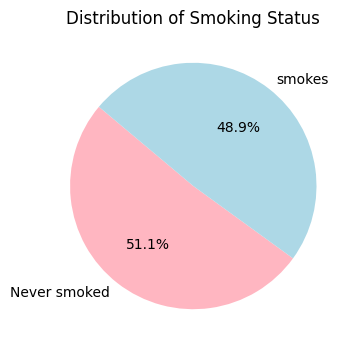

In [38]:
import matplotlib.pyplot as plt
import pandas as pd


# Pie chart data
labels = df1['smoking_status'].value_counts().index
sizes = df1['smoking_status'].value_counts().values

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightpink', 'lightblue'])
plt.title('Distribution of Smoking Status')
plt.show()


Distribution of Smoking Status shows that 48.9% are smokers

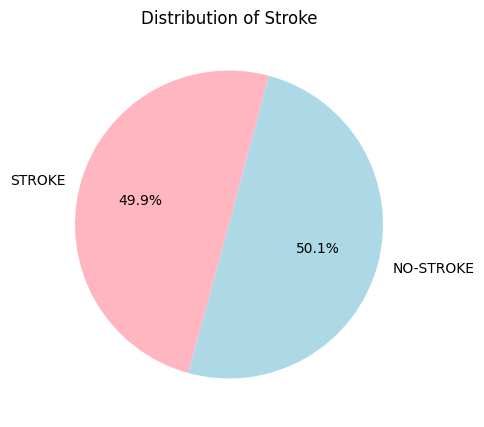

In [39]:
plt.close()
import matplotlib.pyplot as plt
labels = ['STROKE', 'NO-STROKE']
Count = [df1['stroke'].value_counts()['Yes'], df1['stroke'].value_counts()['No']]
colors =  ['lightpink', 'lightblue']
plt.figure(figsize=(5,5))
plt.pie(Count, labels=labels, colors=colors, autopct = '%1.1f%%', startangle=75)
plt.title("Distribution of Stroke")
plt.show()

In our dataset, 49.9% of individuals have experienced a stroke, while 50.1% have not had a stroke.

EXPLORATORY DATA ANALYSIS

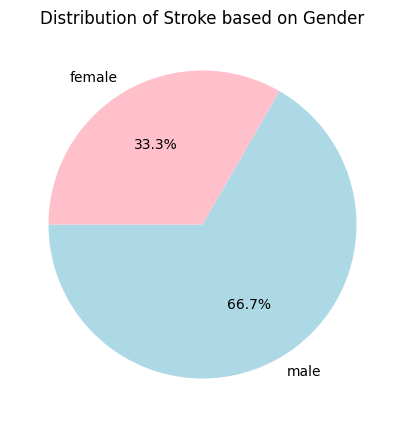

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'sex': ['male', 'male', 'female', 'female', 'male', 'female'], 
                   'stroke': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']}) 
stroke_counts = df.groupby(['sex', 'stroke']).size()
stroke_counts_stroke = stroke_counts['male']['Yes'], stroke_counts['female']['Yes']
gender_labels = ['male', 'female'] 
colors = ['lightblue', 'pink']
plt.figure(figsize=(5,5))
plt.pie(stroke_counts_stroke, labels=gender_labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title("Distribution of Stroke based on Gender")
plt.show()

In the dataset, 33.3% of females have experienced a stroke & 66.7% males have experienced stroke.

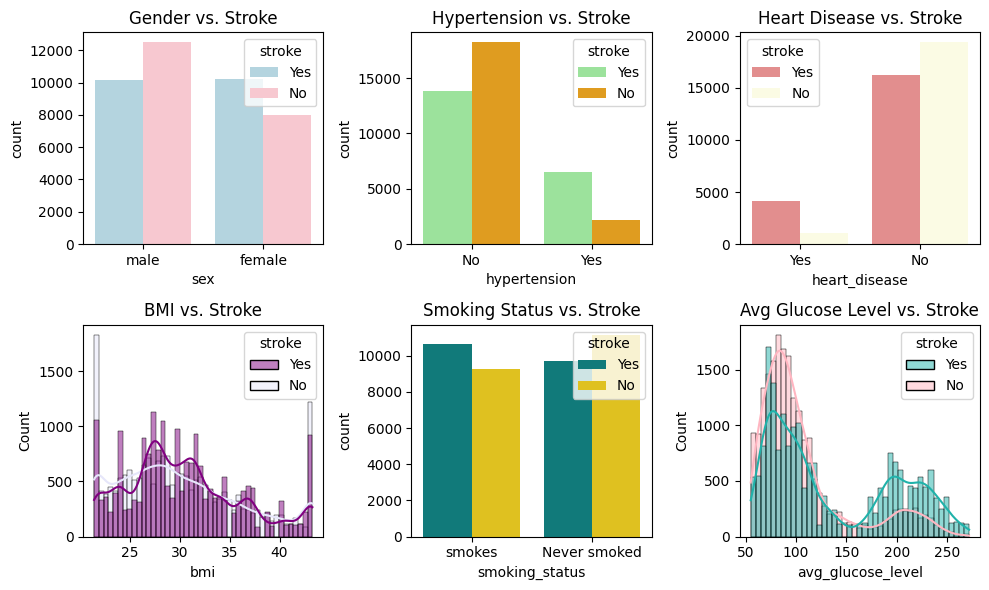

In [41]:
import seaborn as sns
palette_0 = ["lightblue", "pink"]
palette_1 = ["lightgreen", "orange"]
palette_2 = ["lightcoral", "lightyellow"]
palette_3 = ["purple", "lavender"]
palette_4 = ["darkcyan", "gold"]
palette_5 = ["lightseagreen", "lightpink"]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
sns.countplot(x='sex', hue='stroke', data=df1, ax=axes[0], palette=palette_0)
axes[0].set_title('Gender vs. Stroke')
sns.countplot(x='hypertension', hue='stroke', data=df1, ax=axes[1], palette=palette_1)
axes[1].set_title('Hypertension vs. Stroke')
sns.countplot(x='heart_disease', hue='stroke', data=df1, ax=axes[2], palette=palette_2)
axes[2].set_title('Heart Disease vs. Stroke')
sns.histplot(x='bmi', hue='stroke', data=df1, kde=True, ax=axes[3], palette=palette_3)
axes[3].set_title('BMI vs. Stroke')
sns.countplot(x='smoking_status', hue='stroke', data=df1, ax=axes[4], palette=palette_4)
axes[4].set_title('Smoking Status vs. Stroke')
sns.histplot(x='avg_glucose_level', hue='stroke', data=df1, kde=True, ax=axes[5], palette=palette_5)
axes[5].set_title('Avg Glucose Level vs. Stroke')

plt.tight_layout()
plt.show()

There is a higher prevalence of smoking, hypertension among individuals who have experienced a stroke. Females are more affected than males.


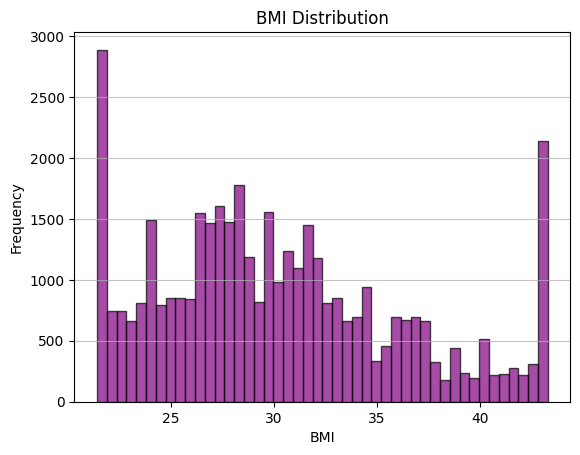

In [42]:
plt.close()
import matplotlib.pyplot as plt
values = df1['bmi']
plt.hist(values, bins = 'auto', color='purple', edgecolor='black', alpha = 0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

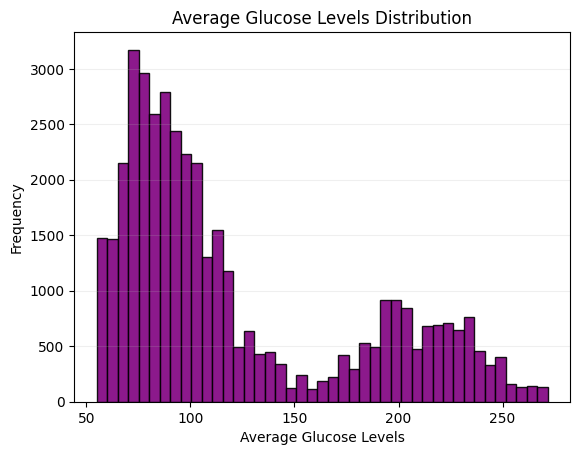

In [43]:
plt.close()
import matplotlib.pyplot as plt
values = df1['avg_glucose_level']
plt.hist(values, bins = 'auto', color='purple', edgecolor='black', alpha = 0.9)
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Average Glucose Levels')
plt.ylabel('Frequency')
plt.title('Average Glucose Levels Distribution')
plt.show()

In [44]:
df1['bmi'].mean()

30.249457493448286

In [45]:
df1['avg_glucose_level'].mean()

122.06127654363318

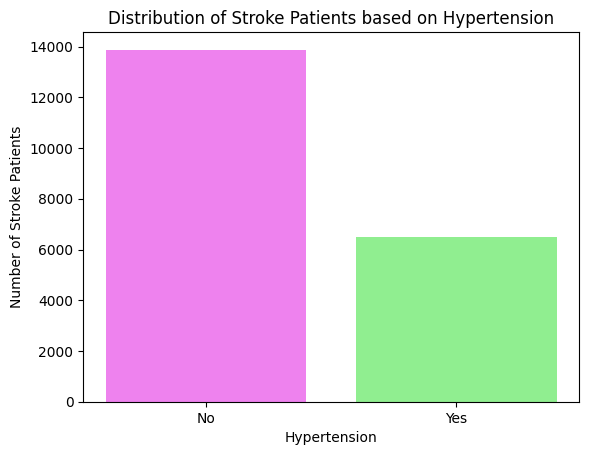

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

stroke_df = df1[df1['stroke'] == 'Yes']
stroke_counts_hypertension = stroke_df['hypertension'].value_counts()
plt.bar(stroke_counts_hypertension.index, stroke_counts_hypertension.values, color=['violet', 'lightgreen'])
plt.xlabel('Hypertension')
plt.ylabel('Number of Stroke Patients')
plt.title('Distribution of Stroke Patients based on Hypertension')
plt.show()


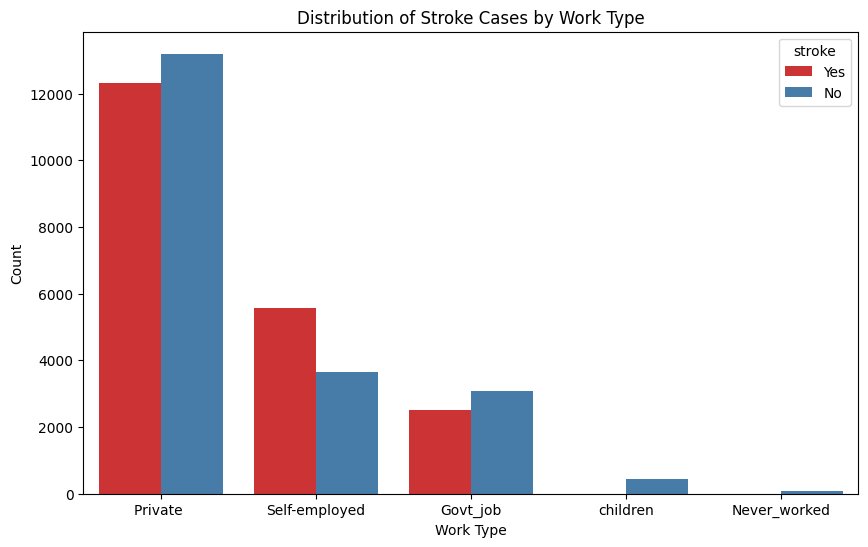

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', hue='stroke', data=df1, palette='Set1')
plt.title('Distribution of Stroke Cases by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

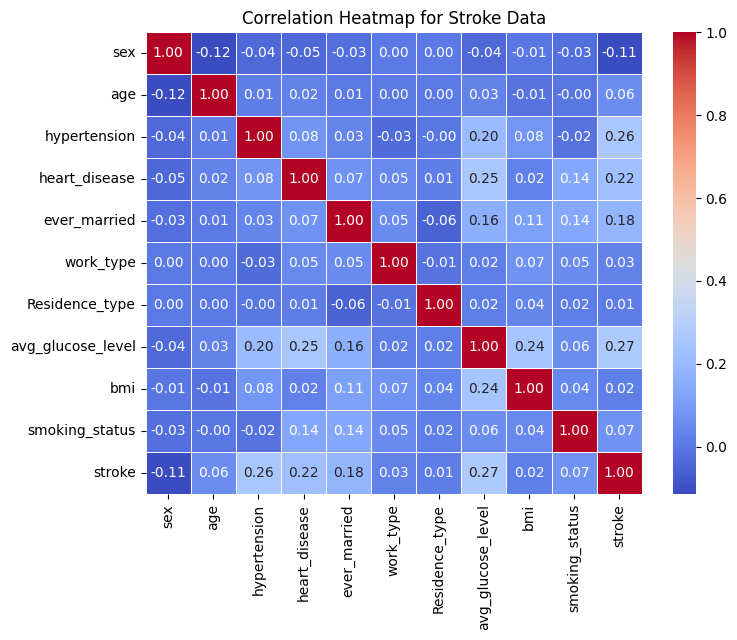

Correlation Coefficients:
                        sex       age  hypertension  heart_disease  \
sex                1.000000 -0.115259     -0.039178      -0.045350   
age               -0.115259  1.000000      0.014365       0.024541   
hypertension      -0.039178  0.014365      1.000000       0.079968   
heart_disease     -0.045350  0.024541      0.079968       1.000000   
ever_married      -0.025981  0.006294      0.033760       0.071596   
work_type          0.003121  0.003647     -0.033133       0.049382   
Residence_type     0.003715  0.002686     -0.002651       0.013000   
avg_glucose_level -0.039357  0.027271      0.203502       0.252034   
bmi               -0.006016 -0.012323      0.082386       0.021374   
smoking_status    -0.027994 -0.002070     -0.017813       0.137279   
stroke            -0.111036  0.058534      0.257182       0.223930   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
sex                   -0.025981   0.003121        0.

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Stroke_data.csv')
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Stroke Data')
plt.show()
print("Correlation Coefficients:")
print(correlation_matrix)

We found strong positive correlations between stroke and hypertension, heart disease, average glucose level, and smoking status, and a weak negative correlation between stroke and gender.


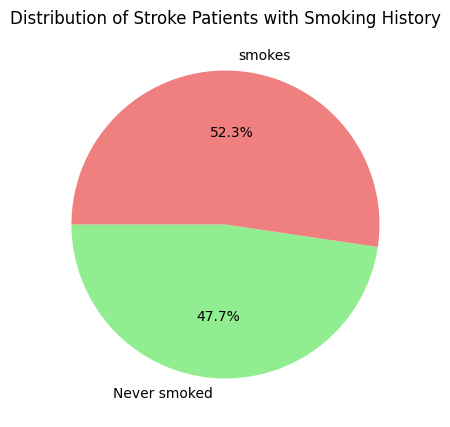

In [49]:
#Distribution of Stroke Patients with smoking history
stroke_smoking_counts = df1[df1['stroke'] == 'Yes'].groupby('smoking_status').size()
labels = stroke_smoking_counts.index
values = stroke_smoking_counts.values

colors = ['lightgreen', 'lightcoral']
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title("Distribution of Stroke Patients with Smoking History")
plt.show()

Among individuals who have experienced a stroke, 52.3% are smokers, while 47.7% have never smoked.

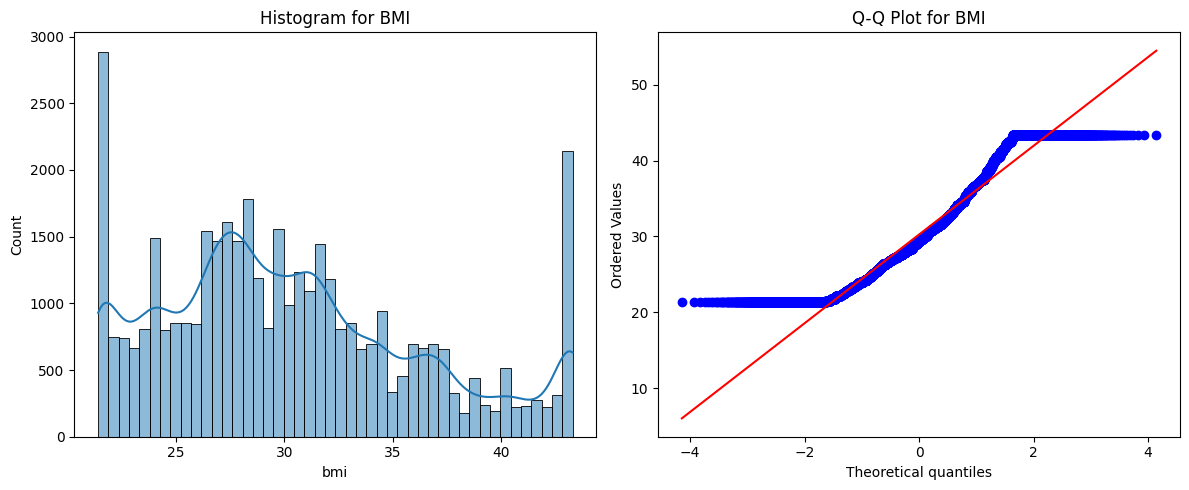

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


plt.figure(figsize=(12, 5))

# Histogram for 'BMI'
plt.subplot(1, 2, 1)
sns.histplot(df1['bmi'], kde=True)
plt.title('Histogram for BMI')

# Q-Q plot for 'BMI'
plt.subplot(1, 2, 2)
stats.probplot(df1['bmi'], plot=plt)
plt.title('Q-Q Plot for BMI')

plt.tight_layout()
plt.show()

The BMI data doesn't follow a normal distribution. The QQ plot illustrates right skewness, indicating more higher BMIs, aligning with obesity as a stroke risk factor.


<span style="font-size:24px">Statistical Test</span>

CHI SQUARE TEST

Null Hypothesis (H0): There is no significant association between sex and the occurrence of stroke. 
Alternate Hypothesis (H1): There is a significant association between sex and the occurrence of stroke.

In [51]:
#Chi square test for sex and stroke
Relation= pd.crosstab(df1.sex, df1.stroke) 
Relation

stroke,No,Yes
sex,,
female,7967,10205
male,12483,10174


In [52]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 510.36504923486814
P: 5.281903460473254e-113
DoF: 1
Expected frequency:  [[ 9101.80019104  9070.19980896]
 [11348.19980896 11308.80019104]]


The extremely small p-value (5.281903460473254e-113) suggests that the observed association between gender and stroke is highly significant. 
Therefore, based on the data, we reject the null hypothesis.


Null Hypothesis (H0): There is no significant association between hypertension and the occurrence of stroke. Alternate Hypothesis (H1): There is a significant association between hypertension and the occurrence of stroke.

In [53]:
#Chi square test for hypertension and stroke
Relation= pd.crosstab(df1.hypertension, df1.stroke) 
Relation


stroke,No,Yes
hypertension,,
No,18234,13876
Yes,2216,6503


In [54]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 2697.9548169703658
P: 0.0
DoF: 1
Expected frequency:  [[16082.91900365 16027.08099635]
 [ 4367.08099635  4351.91900365]]


P-value is less than 0.05. 
Therefore, we reject the null hypothesis and there is a significant association between hypertension and stroke.


Null Hypothesis (H0): There is no significant association between Heart disease and the occurrence of stroke. Alternate Hypothesis (H1): There is a significant association between Heart Disease and the occurrence of stroke.

In [55]:
#Chi square test for heart_disease and stroke
Relation= pd.crosstab(df1.heart_disease, df1.stroke) 
Relation


stroke,No,Yes
heart_disease,,
No,19367,16251
Yes,1083,4128


In [56]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 2050.4567910846954
P: 0.0
DoF: 1
Expected frequency:  [[17839.96913958 17778.03086042]
 [ 2610.03086042  2600.96913958]]


As P-value is less than 0.05, we reject the null hypothesis. 
There is a significant association between heart disease and stroke.


Null Hypothesis (H0): There is no significant association between ever_married and the occurrence of stroke.
Alternate Hypothesis (H1): There is a significant association between ever_married and the occurrence of stroke.

In [65]:
#Chi square test for ever_married and stroke
Relation= pd.crosstab(df1.ever_married, df1.stroke) 
Relation


stroke,No,Yes
ever_married,,
married,15373,18159
unmarried,5077,2220


In [66]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 1349.0092407891616
P: 2.529161732648403e-295
DoF: 1
Expected frequency:  [[16795.15540425 16736.84459575]
 [ 3654.84459575  3642.15540425]]


As P-value (2.529161732648403e-295) is less than 0.05, we reject the null hypothesis. There is a significant association between ever_married and stroke.

Null Hypothesis (H0): There is no significant association between work_type and the occurrence of stroke. Alternate Hypothesis (H1): There is a significant association between work_type and the occurrence of stroke.

In [67]:
#Chi square test for work_type and stroke
Relation= pd.crosstab(df1.work_type, df1.stroke) 
Relation


stroke,No,Yes
work_type,,
Govt_job,3076,2504
Never_worked,85,0
Private,13200,12316
Self-employed,3658,5559
children,431,0


In [68]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 997.2207527499127
P: 1.4285530418780924e-214
DoF: 4
Expected frequency:  [[ 2794.85169855  2785.14830145]
 [   42.5739058     42.4260942 ]
 [12780.18565235 12735.81434765]
 [ 4616.5139974   4600.4860026 ]
 [  215.87474589   215.12525411]]


As P-value (1.4285530418780924e-214) is less than 0.05, we reject the null hypothesis. There is a significant association between work type and stroke.

Null Hypothesis (H0): There is no significant association between bmi and the occurrence of stroke. Alternate Hypothesis (H1): There is a significant association between bmi and the occurrence of stroke.

In [69]:
#Chi square test for bmi and stroke
Relation= pd.crosstab(df1.bmi, df1.stroke) 
Relation

stroke,No,Yes
bmi,,
21.4,1539,580
21.5,95,236
21.6,84,0
21.7,49,118
21.8,63,123
...,...,...
42.9,21,0
43.0,47,0
43.1,7,0


In [70]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 12033.310097522808
P: 0.0
DoF: 218
Expected frequency:  [[1061.34242818 1057.65757182]
 [ 165.78779789  165.21220211]
 [  42.07303632   41.92696368]
 [  83.64520316   83.35479684]
 [  93.16172328   92.83827672]
 [  31.05390776   30.94609224]
 [  34.55999412   34.44000588]
 [  51.58955644   51.41044356]
 [ 169.79475373  169.20524627]
 [  87.15128952   86.84871048]
 [  91.15824536   90.84175464]
 [  24.54260452   24.45739548]
 [  89.65563692   89.34436308]
 [  50.58781748   50.41218252]
 [ 115.70084989  115.29915011]
 [  86.14955056   85.85044944]
 [  52.09042592   51.90957408]
 [ 109.69041613  109.30958387]
 [  40.0695584    39.9304416 ]
 [  45.57912268   45.42087732]
 [ 136.23649857  135.76350143]
 [ 134.73389013  134.26610987]
 [ 103.67998237  103.32001763]
 [  29.55129932   29.44870068]
 [ 111.19302457  110.80697543]
 [ 108.68867717  108.31132283]
 [ 227.39474393  226.60525607]
 [ 112.69563301  112.30436699]
 [ 185.32170761  184.67829239]
 [  62.10781552   61.89218448]
 [ 112.19

As P-value is less than 0.05, we reject the null hypothesis. There is a significant association between bmi and stroke.

Null Hypothesis (H0): There is no significant association between Average glucose levels and the occurrence of stroke. Alternate Hypothesis (H1): There is a significant association between Average glucose levels and the occurrence of stroke.

In [71]:
#Chi square test for avg_glucose_level and stroke
Relation= pd.crosstab(df1.avg_glucose_level, df1.stroke) 
Relation

stroke,No,Yes
avg_glucose_level,,
55.12,6,0
55.22,7,0
55.25,6,0
55.27,7,0
55.32,6,0
...,...,...
266.59,6,0
267.60,6,0
267.61,6,0


In [72]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 39816.98567541076
P: 0.0
DoF: 2902
Expected frequency:  [[ 3.00521688  2.99478312]
 [ 3.50608636  3.49391364]
 [ 3.00521688  2.99478312]
 ...
 [ 3.00521688  2.99478312]
 [ 3.50608636  3.49391364]
 [58.60172916 58.39827084]]


As P-value is less than 0.05, we reject the null hypothesis. There is a significant association between average glucose levels and stroke.

Null Hypothesis (H0): There is no significant association between smoking status and the occurrence of stroke. Alternate Hypothesis (H1): There is a significant association between smoking status and the occurrence of stroke.

In [73]:
#Chi square test for smoking status and stroke
Relation= pd.crosstab(df1.smoking_status, df1.stroke) 
Relation

stroke,No,Yes
smoking_status,,
Never smoked,11157,9714
smokes,9293,10665


In [74]:
c, p, dof, expected = chi2_contingency(Relation)

print("Chi:",c)
print("P:",p)
print("DoF:",dof)
print("Expected frequency: ", expected)

Chi: 193.6862893275429
P: 4.985781684335147e-44
DoF: 1
Expected frequency:  [[10453.64691763 10417.35308237]
 [ 9996.35308237  9961.64691763]]


As P-value(4.985781684335147e-44) is less than 0.05, we reject the null hypothesis. There is a significant association between smoking status and stroke.

<span style="font-size:24px">Machine Learning Classification Models</span>

Accuracy: 0.6710751898114132

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.70      4085
           1       0.71      0.58      0.64      4081

    accuracy                           0.67      8166
   macro avg       0.68      0.67      0.67      8166
weighted avg       0.68      0.67      0.67      8166

Sensitivity: 0.5797598627787307
Specificity: 0.7623011015911872


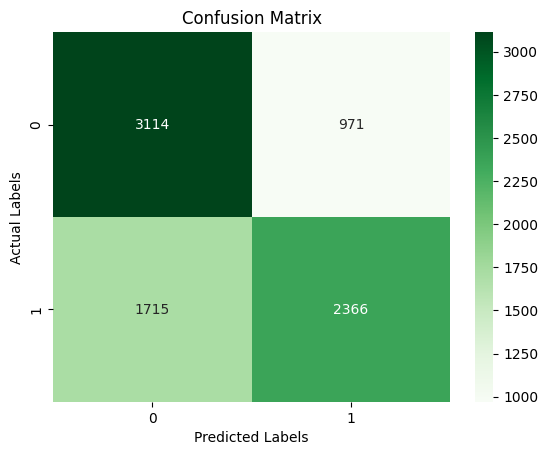

In [76]:
#Logistic Regression
#Importing all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X = df2[['sex','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df2['stroke']

# Spliting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression(max_iter=1000,random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)

# Create a confusion matrix with actual and predicted values
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

accuracy = accuracy_score(y_test_log, y_pred_log)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test_log, y_pred_log))
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

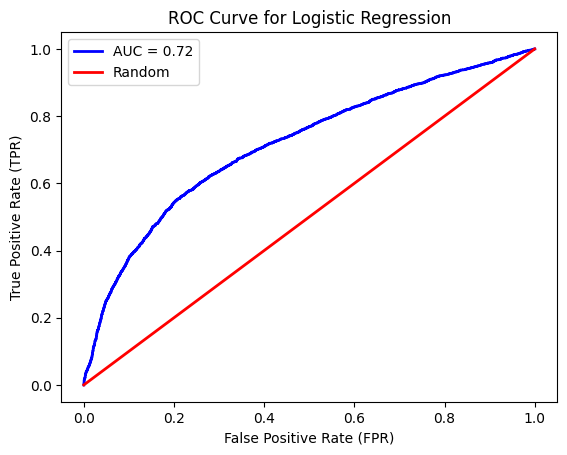

In [77]:
#ROC curve for logistic regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

F1 Score,Accuracy,Precision,Recall & AUC for Logistic Regression are 64 %,67 %,71 %,58 % & 0.72 respectively.


In [78]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.8191280920891502

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      4085
           1       0.83      0.80      0.82      4081

    accuracy                           0.82      8166
   macro avg       0.82      0.82      0.82      8166
weighted avg       0.82      0.82      0.82      8166



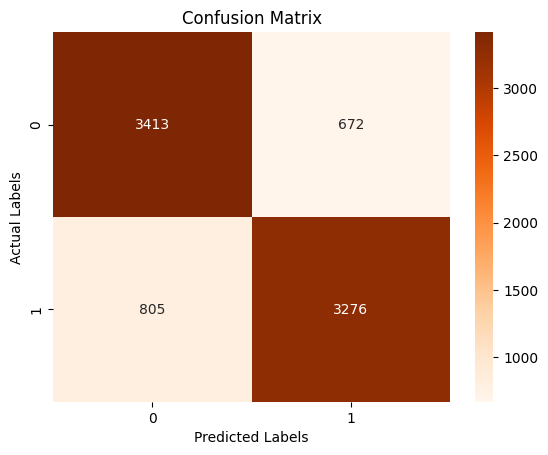

In [79]:
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = df2[['sex','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df2['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost training pool
train_pool = Pool(X_train, label=y_train)
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss',eval_metric='Accuracy', random_seed=42,verbose=False)
model.fit(train_pool)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Displaying the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

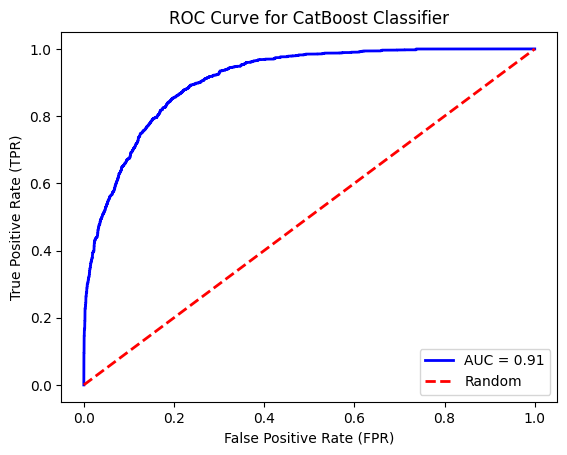

In [80]:
#ROC curve for catboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_pool = Pool(X_train, label=y_train)
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss',eval_metric='Accuracy', random_seed=42,verbose=False)
model.fit(train_pool)
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for CatBoost Classifier')
plt.legend()
plt.show()

F1 Score, Accuracy, Precision, Recall & AUC for cat boost model are  82 %, 82 %, 83 %, 80 % & 0.91 respectively.

Accuracy: 0.8242713690913543

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      4085
           1       0.76      0.94      0.84      4081

    accuracy                           0.82      8166
   macro avg       0.84      0.82      0.82      8166
weighted avg       0.84      0.82      0.82      8166



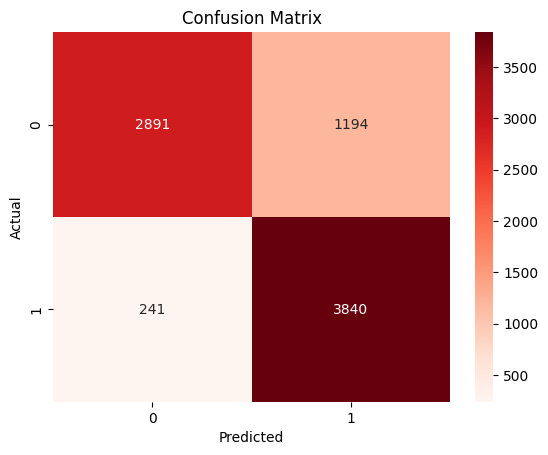

In [81]:
#K nearest algorithm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df2[['sex','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df2['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a k-NN classifier
k_value = 3  
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Displaying the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

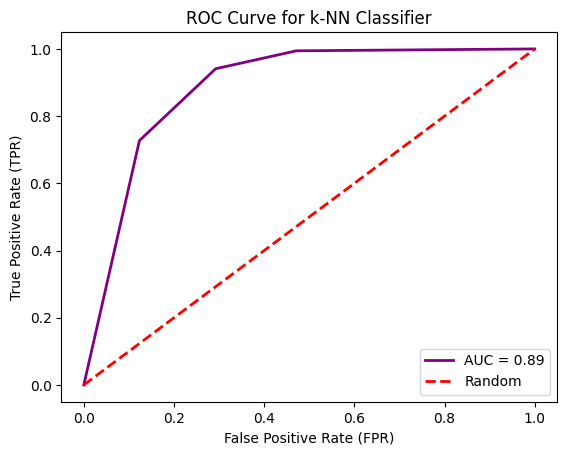

In [82]:
#ROC curve for knearest algorithm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a k-NN classifier
k_value = 3  
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train, y_train)

# Get decision scores instead of probabilities
y_scores = model.predict_proba(X_test)[:, 1]  

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, color='purple', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for k-NN Classifier')
plt.legend()
plt.show()

F1 Score, Accuracy, Precision, Recall & AUC for KNN Classifier model are 84 %, 82 %, 76 %, 94 % & 0.89 respectively.

Accuracy: 0.9891011511143767

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4085
           1       0.98      1.00      0.99      4081

    accuracy                           0.99      8166
   macro avg       0.99      0.99      0.99      8166
weighted avg       0.99      0.99      0.99      8166



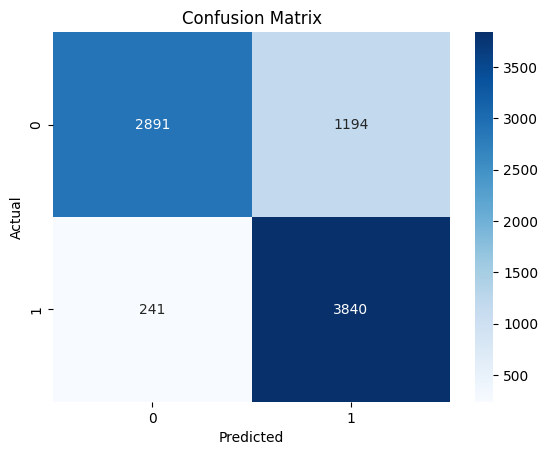

In [83]:
#Random Forest
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df2[['sex','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df2['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Additional evaluation metrics (classification report)
print('\nClassification Report:\n', classification_report(y_test, predictions))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

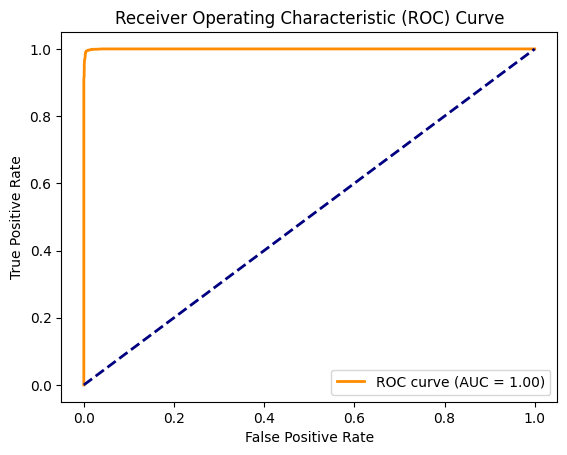

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

F1 Score, Accuracy, Precision, Recall & AUC for KNN Classifier model are  99 %, 99 %, 100 %, 98 % & 1.00 respectively.



In [85]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Specifying the features and target variable
X = df2[['sex','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df2['stroke']

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate AUC for each fold
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Print the AUC for each fold
for i, auc in enumerate(cv_results, 1):
    print(f'Fold {i}: AUC = {auc:.4f}')

# Print the mean AUC across all folds
print(f'Mean AUC: {cv_results.mean():.4f}')

Fold 1: AUC = 0.9998
Fold 2: AUC = 0.9999
Fold 3: AUC = 0.9997
Fold 4: AUC = 0.9998
Fold 5: AUC = 0.9998
Mean AUC: 0.9998


We stratified k-fold cross- validation to assess model generalization and mitigate overfitting risks by evaluating the mean Area Under the Curve (AUC).


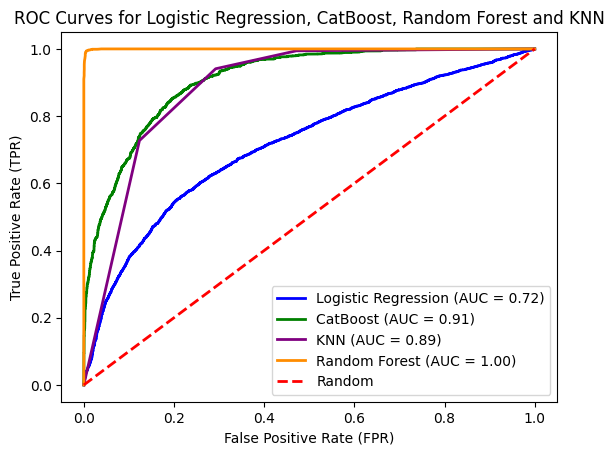

In [86]:
#ROC curve for 3 models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train models
# Model 1: Logistic Regression
model_lr = LogisticRegression(max_iter=1000,random_state=42)
model_lr.fit(X_train, y_train)
#Model 2:CatBoost
model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss',eval_metric='Accuracy', random_seed=42,verbose=False)
model_catboost.fit(X_train, y_train)
# Model 3: k-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
#Model 4: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Get predicted probabilities for the positive class
y_probs_lr = model_lr.predict_proba(X_test)[:, 1]
y_probs_catboost = model_catboost.predict_proba(X_test)[:, 1]
y_probs_knn = model_knn.predict_proba(X_test)[:, 1]
y_probs_rf = model.predict_proba(X_test)[:, 1]
# Calculate ROC curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_probs_catboost)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_lr = roc_auc_score(y_test, y_probs_lr)
roc_auc_catboost = roc_auc_score(y_test, y_probs_catboost)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)
# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost (AUC = {roc_auc_catboost:.2f})')
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression, CatBoost, Random Forest and KNN')
plt.legend()
plt.show()

Random Forest Model achieved high accuracy.

